In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import os
import gluonts.torch
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

In [2]:
data = pd.read_csv('data/calm_p.csv')

In [3]:
data.head()

,Time,1,2,3,4,5,6
0,10.000,1.442542,-0.343208,-0.528292,1.852549,2.037647,-0.435750
1,10.001,1.442150,-0.343208,-0.527508,1.852549,2.037255,-0.435358
2,10.002,1.441366,-0.343600,-0.526724,1.853333,2.036471,-0.434966
3,10.003,1.440582,-0.344384,-0.525940,1.854118,2.035686,-0.434966
4,10.004,1.440189,-0.345169,-0.525547,1.854902,2.035294,-0.435358


In [4]:
data = data.set_index(pd.to_datetime(data.index, unit = 's'))

In [5]:
data.columns

Index(['Time', '1', '2', '3', '4', '5', '6'], dtype='object')

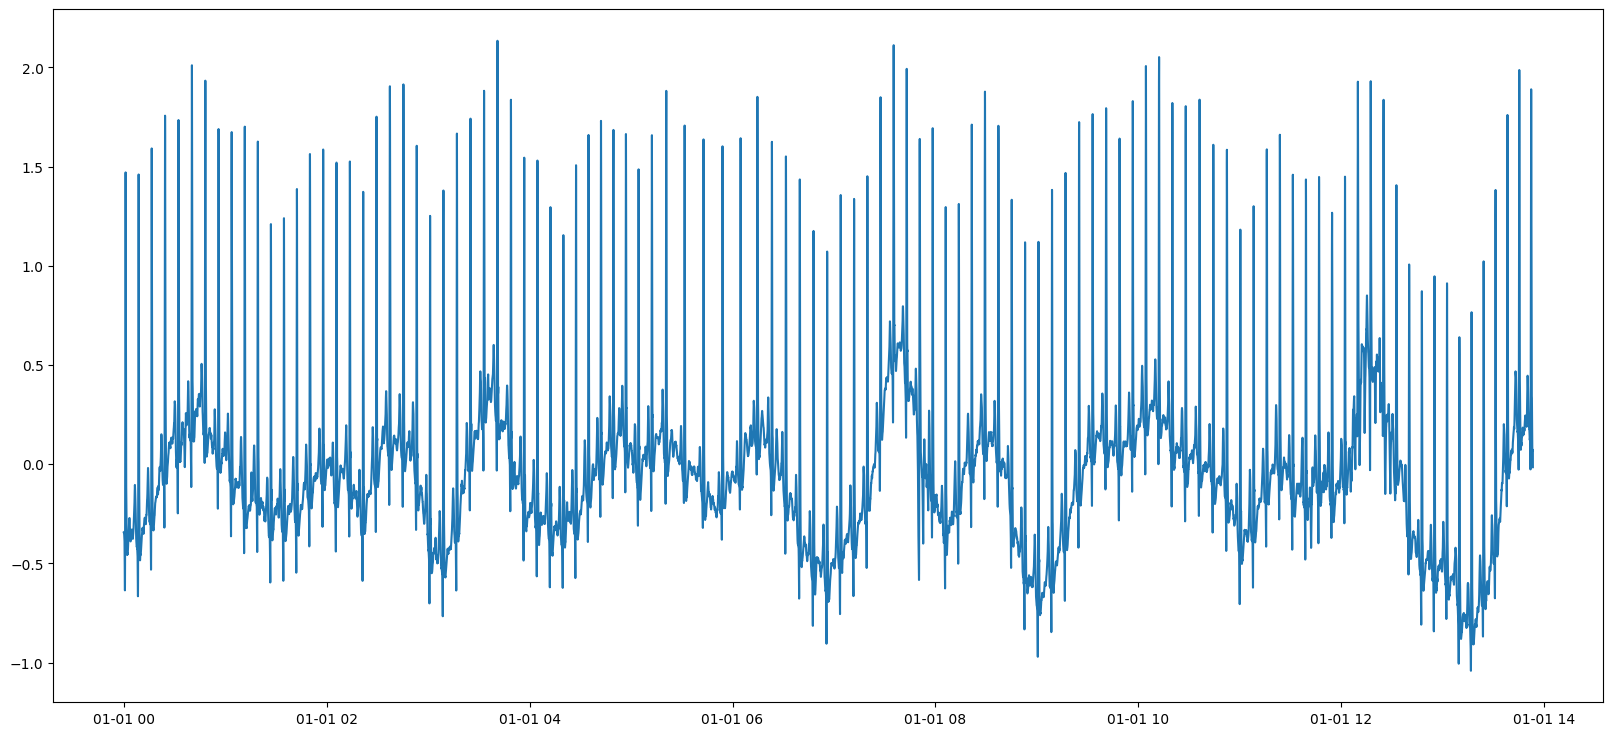

In [6]:
plt.figure(figsize=(20,9))
plt.plot(data['2'])

In [7]:
pdts_data = PandasDataset(data, target = '2')
train,test = split(pdts_data, offset=-2500)

In [12]:
test = test.generate_instances(prediction_length = 2500, windows=1)

In [8]:
import numpy as np
import torch.optim as optim
import torch.utils.data as torch_data
 
model = DeepAREstimator(freq = '10min', prediction_length=2500, trainer_kwargs={'max_epochs':5})

EPOCHS = 1

In [9]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
c:\Users\Oleg\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                           

Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached -0.40622 (best -0.40622), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_2\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached -1.66656 (best -1.66656), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_2\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached -2.00548 (best -2.00548), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_2\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached -2.13245 (best -2.13245), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_2\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached -2.31250 (best -2.31250), saving model to 'c:\\content\\github\\TimeSeries\\HM13\\lightning_logs\\version_2\\checkpoints\\epoch=4-step=250.ckpt' as top

In [13]:
forecast = list(predictor.predict(test.input))

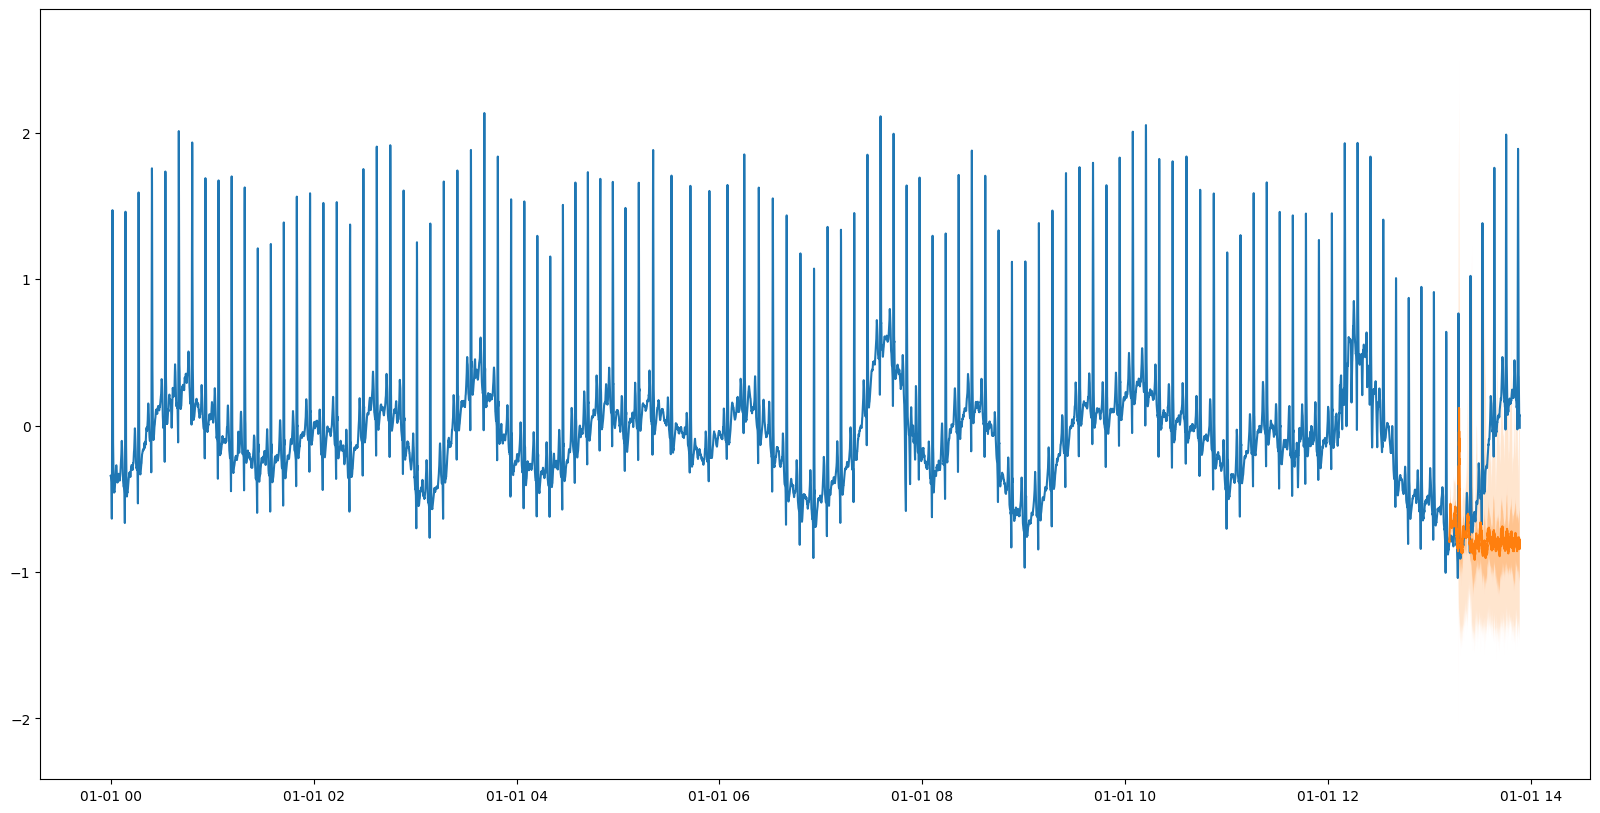

In [14]:
plt.figure(figsize=(20,10))
plt.plot(data['2'])
for fore in forecast:
    fore.plot()

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
offset = 2500
predictions = forecast[-1].samples[-1]
print("RMSE:", np.sqrt(mean_squared_error(data['2'][len(data['2'])-offset:], predictions)))
print("MAPE:", mean_absolute_percentage_error(data['2'][len(data['2'])-offset:], predictions))
print("MAE:", mean_absolute_error(data['2'][len(data['2'])-offset:], predictions))
print("R2: ", r2_score(data['2'][len(data['2'])-offset:], predictions))

RMSE: 0.7730527439874594
MAPE: 5.854732087823156
MAE: 0.5767931193820159
R2:  -1.1487202431975798
